In [14]:
import torch
from torch import nn,sqrt,var,fft
#from math import sqrt

import os
#import sys
#module_path = os.path.abspath(os.path.join('..'))
#if module_path not in sys.path:
#    sys.path.append(module_path)

%matplotlib inline
import matplotlib.pyplot as plt

import torchsde

In [2]:
#import hsde # local package
# FIXME: I created the local package but now can't use it, it has no modules or functions associated

In [3]:
import sys
sys.path.append('../heat')
from heat import *
# FIXME: the package was created to avoid path append

In [19]:
batch_size = 32     # ensemble size
N = state_size = 256    # number of Fourier modes
brownian_size = 256 # number of noise modes
t_size = 20         # number of output time steps in simulations

nu = 0.001
alpha = 0.1

In [22]:
sde = Heat(nu,alpha,state_size)
y0 = torch.zeros((batch_size, state_size))
ts = torch.linspace(0, 1, t_size)
# Initial state y0, the SDE is solved over the interval [ts[0], ts[-1]].
# ys will have shape (t_size, batch_size, state_size)
ys = torchsde.sdeint(sde, y0, ts)

In [23]:
var(fft.ifft(ys,N,2),(1,2))

tensor([0.0000e+00, 3.8466e-06, 4.4393e-05, 7.5252e-04, 1.5294e-02, 3.3979e-01,
        7.9558e+00, 1.9279e+02, 4.7848e+03, 1.2093e+05, 3.0981e+06, 8.0215e+07,
        2.0958e+09, 5.5134e+10, 1.4592e+12, 3.8823e+13, 1.0372e+15, 2.7821e+16,
        7.4875e+17, 2.0205e+19])

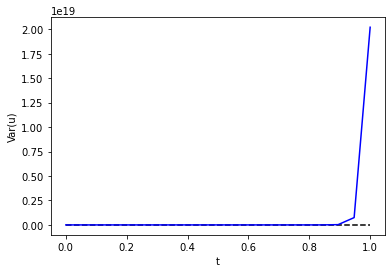

In [24]:
title  = ""
ylabel = "Var(u)"
xlabel = "t"

plt.figure()
plt.plot(ts, heat_analyt_variance(ts,nu), color='k', linestyle='dashed')
plt.plot(ts, var(fft.ifft(ys,N,2),(1,2)), color='blue')
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()

In [8]:
def heat_analyt_variance(t,nu,L=1.):
    return .5*L*L/nu*(sqrt(1.+4.*nu*t/L**2)-1.)

def heat_analyt_gradient_variance(t,nu,L=1.):
    return 0.5/nu